Implementation of Data classification with deep learning using Tensorflow (with fmnist 10% data)\
Conference Paper · October 2017\
DOI: 10.1109/UBMK.2017.8093521

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models;
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

train_images, test_images = train_images/255.0, test_images/255.0

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

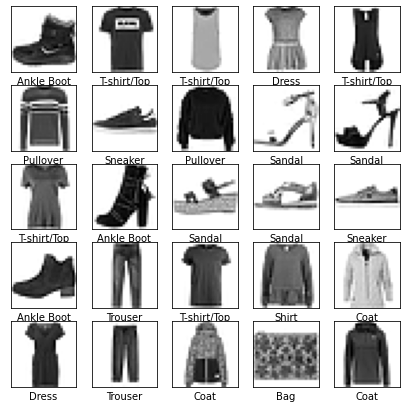

In [4]:
#verifying the data
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

plt.figure(figsize=(7,7))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1);

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1);

train_images = train_images[0:6000]
train_labels = train_labels[0:6000]

In [7]:
train_images.shape

(6000, 28, 28, 1)

In [8]:
#creating the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (5,5), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
#model.add(layers.Dense(3136, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, batch_size=128, epochs=10, verbose=1, validation_data=(train_images, train_labels))

Epoch 1/10
47/47 [==============================] - 7s 151ms/step - loss: 1.0705 - accuracy: 0.6355 - val_loss: 0.6817 - val_accuracy: 0.7417
Epoch 2/10
47/47 [==============================] - 7s 146ms/step - loss: 0.6368 - accuracy: 0.7647 - val_loss: 0.5669 - val_accuracy: 0.7868
Epoch 3/10
47/47 [==============================] - 7s 145ms/step - loss: 0.5461 - accuracy: 0.8005 - val_loss: 0.5121 - val_accuracy: 0.8243
Epoch 4/10
47/47 [==============================] - 7s 147ms/step - loss: 0.4957 - accuracy: 0.8230 - val_loss: 0.4445 - val_accuracy: 0.8428
Epoch 5/10
47/47 [==============================] - 7s 146ms/step - loss: 0.4357 - accuracy: 0.8453 - val_loss: 0.4135 - val_accuracy: 0.8598
Epoch 6/10
47/47 [==============================] - 7s 146ms/step - loss: 0.4020 - accuracy: 0.8595 - val_loss: 0.3621 - val_accuracy: 0.8772
Epoch 7/10
47/47 [==============================] - 7s 146ms/step - loss: 0.3755 - accuracy: 0.8640 - val_loss: 0.3394 - val_accuracy: 0.8817
Epoch 